In [239]:
#importing libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer


In [195]:
dataFrame=pd.read_csv('./train.csv')
dataFrame.dropna(axis=0,subset=['s.s.temp.'],inplace=True)
features=['air temp.','latitude','longitude','humidity','zon.winds','mer.winds']
y=dataFrame['s.s.temp.']
X=dataFrame[features]
dataFrame.info()

# Pipeline=Pipeline('preprocessor')
# X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104409 entries, 0 to 104408
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       104409 non-null  int64  
 1   month      104409 non-null  int64  
 2   day        104409 non-null  int64  
 3   latitude   104409 non-null  float64
 4   longitude  104409 non-null  float64
 5   zon.winds  89839 non-null   float64
 6   mer.winds  89839 non-null   float64
 7   humidity   65615 non-null   float64
 8   air temp.  96571 non-null   float64
 9   s.s.temp.  104409 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 8.0 MB


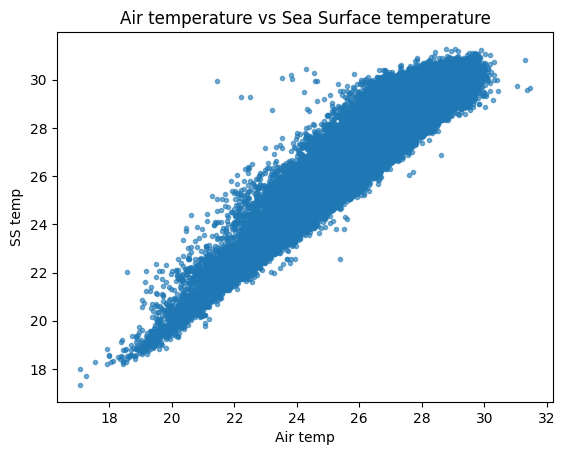

In [147]:
#testing for correlations between sea surface temperature and other factors
plt.scatter(X['air temp.'],y,marker='.',alpha=0.6)
plt.title('Air temperature vs Sea Surface temperature')
plt.xlabel('Air temp')
plt.ylabel('SS temp')
plt.show(
)

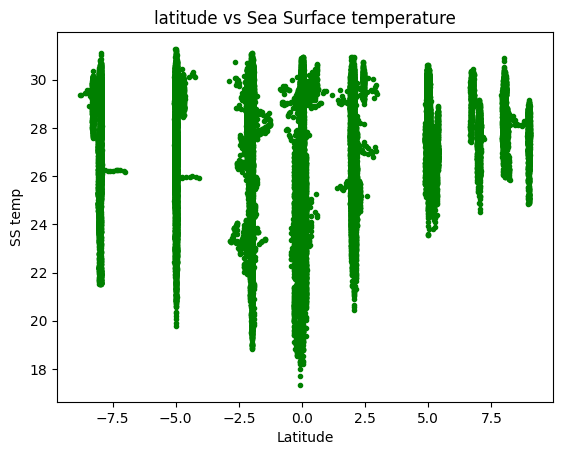

In [125]:
plt.scatter(X['latitude'],y,color='green',marker='.')
plt.title('latitude vs Sea Surface temperature')
plt.xlabel('Latitude')
plt.ylabel('SS temp')
plt.show()

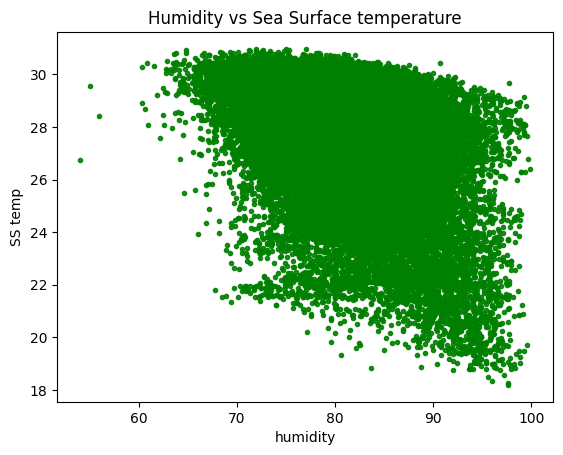

In [127]:
plt.scatter(X['humidity'],y,color='green',marker='.',alpha=0.9)
plt.title('Humidity vs Sea Surface temperature')
plt.xlabel('humidity')
plt.ylabel('SS temp')
plt.show()

In [148]:
#features used


# target_features=dataFrame['s.s.temp.'].values
# training_features=dataFrame[features].values
# print(training_features)
df_drop=dataFrame.dropna(axis=0)
y_drop=df_drop['s.s.temp.']
X_drop=df_drop[features]

# df_drop.info()

MLalgorithm=LinearRegression()
X_train,X_val,y_train,y_val=train_test_split(X_drop,y_drop,test_size=0.2,train_size=0.8,random_state=1)
MLmodel=MLalgorithm.fit(X_train,y_train)

print(MLmodel.score(X_val,y_val))

#scores=model_selection.cross_val_score(MLalgorithm,training_features,target_features,scoring='accuracy',cv=50)
#print(scores)




0.9250655128172794


In [264]:
xgb_model=xgb.XGBRegressor(random_state=1,n_estimators=189)
myimputer=SimpleImputer(strategy='median') # Algorithm with simple imputer
# myimputer=IterativeImputer(max_iter=100,initial_strategy='median')
# myimputer=KNNImputer(max_iter=100)
X_imputed=pd.DataFrame(myimputer.fit_transform(X))
X_imputed.columns=X.columns
X_train,X_val,y_train,y_val=train_test_split(X_imputed,y,test_size=0.2,train_size=0.8,random_state=1)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_val,y_val)

0.96172057028536

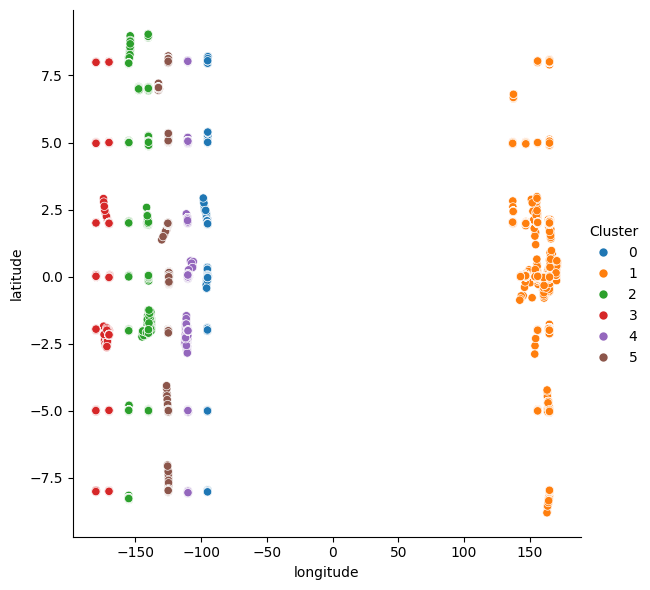

In [265]:
# print(X_imputed)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
a=pd.DataFrame(X_imputed[['latitude','longitude']])

a["Cluster"] = kmeans.fit_predict(a)
a["Cluster"] = a["Cluster"].astype("category")
sns.relplot(x="longitude", y="latitude", hue="Cluster", data=a, height=6)

In [ ]:

dataFrame['Cluster']=a["Cluster"]
dataFrame.corr()


,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.,humid and month,lat and long,Cluster
year,1.000000,-0.049355,-0.002275,-0.002274,-0.013361,-0.045173,-0.192424,-0.037977,0.212008,0.219676,0.105498,0.105658,-0.084296
month,-0.049355,1.000000,0.010564,-0.000169,-0.006366,0.048058,0.225312,-0.140442,-0.137345,-0.098703,-0.374742,0.009934,-0.005736
day,-0.002275,0.010564,1.000000,-0.002158,-0.002984,0.009165,0.003823,-0.004931,-0.005773,-0.003908,-0.017441,0.002224,0.000629
latitude,-0.002274,-0.000169,-0.002158,1.000000,0.039898,0.127751,0.002152,0.169732,0.070133,0.127508,-0.033016,-0.013660,-0.061136
longitude,-0.013361,-0.006366,-0.002984,0.039898,1.000000,0.419216,-0.118610,-0.039895,0.350036,0.425969,-0.006075,-0.763446,-0.585493
zon.winds,-0.045173,0.048058,0.009165,0.127751,0.419216,1.000000,0.071219,0.062317,0.210095,0.342753,0.008452,-0.341401,-0.278527
mer.winds,-0.192424,0.225312,0.003823,0.002152,-0.118610,0.071219,1.000000,0.120932,-0.385561,-0.334296,-0.188154,-0.060324,0.162111
humidity,-0.037977,-0.140442,-0.004931,0.169732,-0.039895,0.062317,0.120932,1.000000,-0.409888,-0.355206,-0.080024,-0.035645,0.008075
air temp.,0.212008,-0.137345,-0.005773,0.070133,0.350036,0.210095,-0.385561,-0.409888,1.000000,0.949209,0.058564,-0.083500,-0.284526
s.s.temp.,0.219676,-0.098703,-0.003908,0.127508,0.425969,0.342753,-0.334296,-0.355206,0.949209,1.000000,0.029753,-0.168312,-0.356553


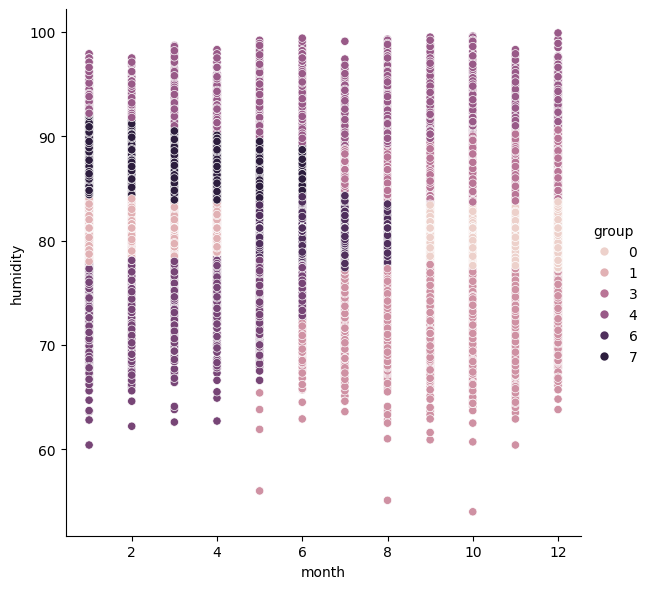

In [267]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=8)  #8 for the seasons and season transitions
X_imputed['month']=dataFrame['month']
b=pd.DataFrame(X_imputed[['month','humidity']])

b["group"] = kmeans2.fit_predict(b)
b["group"] = b["group"].astype("int64")
sns.relplot(x="month", y="humidity", hue="group", data=b, height=6)


Clustering with month and humidity , clustering did not have much impact on accuracy as compared to month alone.
Could try using cluster or month alone.

In [270]:
X_imputed['Cluster']=a['Cluster'].astype('int64')
X_imputed['month']=b['month'].astype('int64')


# X_imputed.drop(['latitude','longitude'],axis=1)
X_train,X_val,y_train,y_val=train_test_split(X_imputed,y,test_size=0.3,train_size=0.7,random_state=1)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_val,y_val)


# print(X_imputed.info())
# X_train.head()

0.9708983002424068

In [269]:
dataFrame['humid and month']=X_imputed['humid and month']
dataFrame['lat and long']=X_imputed['Cluster']
dataFrame.corr()



# plt.scatter(dataFrame['s.s.temp.'],dataFrame['humid and month'],marker='.')
# plt.show()



KeyError: 'humid and month'

In [ ]:
dummy=xgb.XGBRegressor(random_state=1)
attributes_dict={'n_estimators':[x for x in range(100,300,25)],'max_depth':[3,4,5,6,7,8]}
new_model=GridSearchCV(dummy,param_grid=attributes_dict,n_jobs=3)